# Outils

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import geopandas as gpd

# Dataframes : Préparation de données

DF: WORLD MAP GEOMETRY ==> naturalearth_lowres

In [2]:
df_wm = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df_wm.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


DF : PAYS DU MONDE ==> Tout les pays + iso_a3

In [3]:
world = pd.read_html('https://fr.wikipedia.org/wiki/Liste_des_codes_pays_du_CIO')
len(world)

7

In [5]:
df_world = world[1]
df_world.head()

,CodeCIO[2],Drapeau/pays,ISO 3166-1alpha-3
0,AFG,Afghanistan,AFG
1,ALB,Albanie,ALB
2,ALG,Algérie (1968–),DZA
3,AND,Andorre,AND
4,ANG,Angola,AGO


In [6]:
df_world.columns.map(type)

Index([<class 'str'>, <class 'str'>, <class 'str'>], dtype='object')

In [7]:
df_world.columns = df_world.columns.astype(str)

In [8]:
df_world = df_world.rename({'CodeCIO[2]': 'CodeCIO', 'Drapeau/pays': 'pays', 'ISO 3166-1alpha-3': 'iso_a3'}, axis=1)
df_world

,CodeCIO,pays,iso_a3
0,AFG,Afghanistan,AFG
1,ALB,Albanie,ALB
2,ALG,Algérie (1968–),DZA
3,AND,Andorre,AND
4,ANG,Angola,AGO
...,...,...,...
204,VIE,Viêt Nam,VNM
205,VIN,Saint-Vincent-et-les-Grenadines,VCT
206,YEM,Yémen,YEM
207,ZAM,Zambie,ZMB


DF : CHIFFRE VACCIN EN FRANCE PAR REGION

In [15]:
table = pd.read_html('https://en.wikipedia.org/wiki/COVID-19_pandemic_in_France', match='COVID-19 cases in France by region')
len(table)

2

In [16]:
df_fr = table[0]
df_fr.head()

,Region,Region.1,Cases[274],Deaths[275][276]
0,Metropolitan France,Auvergne-Rhône-Alpes,816182,11563
1,Metropolitan France,Bourgogne-Franche-Comté,233364,4796
2,Metropolitan France,Brittany,142160,1631
3,Metropolitan France,Centre-Val de Loire,173398,2747
4,Metropolitan France,Corse,14603,205


In [17]:
df_fr = df_fr[0:13]
df_fr

,Region,Region.1,Cases[274],Deaths[275][276]
0,Metropolitan France,Auvergne-Rhône-Alpes,816182,11563
1,Metropolitan France,Bourgogne-Franche-Comté,233364,4796
2,Metropolitan France,Brittany,142160,1631
3,Metropolitan France,Centre-Val de Loire,173398,2747
4,Metropolitan France,Corse,14603,205
5,Metropolitan France,Grand Est,414736,10131
6,Metropolitan France,Hauts-de-France,592109,9153
7,Metropolitan France,Île-de-France,1341306,20320
8,Metropolitan France,Normandie,226734,3324
9,Metropolitan France,Nouvelle-Aquitaine,308044,3813


In [18]:
df_fr = df_fr.drop(['Region'], axis=1)

In [19]:
df_fr = df_fr.rename({'Region.1' : 'Region', 'Cases[274]' : 'Cases', 'Deaths[275][276]' : 'Deaths'}, axis=1)
df_fr

,Region,Cases,Deaths
0,Auvergne-Rhône-Alpes,816182,11563
1,Bourgogne-Franche-Comté,233364,4796
2,Brittany,142160,1631
3,Centre-Val de Loire,173398,2747
4,Corse,14603,205
5,Grand Est,414736,10131
6,Hauts-de-France,592109,9153
7,Île-de-France,1341306,20320
8,Normandie,226734,3324
9,Nouvelle-Aquitaine,308044,3813


In [20]:
df_fr.dtypes

Region    object
Cases     object
Deaths    object
dtype: object

In [21]:
df_fr['Cases'] = df_fr['Cases'].astype(float)
df_fr['Deaths'] = df_fr['Deaths'].astype(float)

DF : CHIFFRE VACCIN MONDIALE 12/06/2021

In [22]:
table_vaccin = pd.read_html('https://www.sortiraparis.com/actualites/coronavirus/articles/240384-vaccination-dans-le-monde-le-lundi-12-juillet-2021-pourcentage-de-population-vac')
len(table_vaccin)

2

In [23]:
df_vaccin = table_vaccin[0]
df_vaccin.head()

,0,1,2,3
0,Pays,Personnes totalement vaccinées,Population totale,Pourcentage
1,Afghanistan,219.159,38.928.341,-
2,Albanie,443.165,2.862.427,-
3,Algérie,0,43.851.043,-
4,Samoa américaines,0,55.196,-


In [24]:
df_vaccin.drop(0,inplace=True)
df_vaccin.head()

,0,1,2,3
1,Afghanistan,219.159,38.928.341,-
2,Albanie,443.165,2.862.427,-
3,Algérie,0,43.851.043,-
4,Samoa américaines,0,55.196,-
5,Andorre,26.613,77.265,-


In [25]:
df_vaccin.columns.map(type)

Index([<class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>], dtype='object')

In [26]:
df_vaccin.columns = df_vaccin.columns.astype(str)

In [27]:
df_vaccin = df_vaccin.rename(columns={"0": "pays", "1": "personnes vaccinees", "2" : "population total"})
df_vaccin.head()

,pays,personnes vaccinees,population total,3
1,Afghanistan,219.159,38.928.341,-
2,Albanie,443.165,2.862.427,-
3,Algérie,0,43.851.043,-
4,Samoa américaines,0,55.196,-
5,Andorre,26.613,77.265,-


In [28]:
df_vaccin = df_vaccin.drop('3', 1)
df_vaccin

,pays,personnes vaccinees,population total
1,Afghanistan,219.159,38.928.341
2,Albanie,443.165,2.862.427
3,Algérie,0,43.851.043
4,Samoa américaines,0,55.196
5,Andorre,26.613,77.265
...,...,...,...
235,Wallis-et-Futuna,4.502,11.245
236,Sahara occidental,0,597.330
237,Yémen,8.577,29.825.967
238,Zambie,46.489,18.383.956


In [29]:
df_vaccin["personnes vaccinees"] = [x.replace(".", "") for x in df_vaccin["personnes vaccinees"]]
df_vaccin["population total"] = [x.replace(".", "") for x in df_vaccin["population total"]]

In [30]:
df_vaccin['personnes vaccinees'] = df_vaccin['personnes vaccinees'].astype(float)
df_vaccin['population total'] = df_vaccin['population total'].astype(float)
df_vaccin.dtypes

pays                    object
personnes vaccinees    float64
population total       float64
dtype: object

In [32]:
df_vaccin = df_vaccin.merge(df_world, on='pays')
df_vaccin.head()

,pays,personnes vaccinees,population total,CodeCIO,iso_a3
0,Afghanistan,219159.0,38928341.0,AFG,AFG
1,Albanie,443165.0,2862427.0,ALB,ALB
2,Samoa américaines,0.0,55196.0,ASA,ASM
3,Andorre,26613.0,77265.0,AND,AND
4,Angola,599828.0,32866267.0,ANG,AGO


In [33]:
df_vaccin = df_vaccin.merge(df_wm, on="iso_a3")
df_vaccin.head()

,pays,personnes vaccinees,population total,CodeCIO,iso_a3,pop_est,continent,name,gdp_md_est,geometry
0,Afghanistan,219159.0,38928341.0,AFG,AFG,34124811,Asia,Afghanistan,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,Albanie,443165.0,2862427.0,ALB,ALB,3047987,Europe,Albania,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
2,Angola,599828.0,32866267.0,ANG,AGO,29310273,Africa,Angola,189000.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
3,Arménie,49654.0,2963234.0,ARM,ARM,3045191,Asia,Armenia,26300.0,"POLYGON ((46.50572 38.77061, 46.14362 38.74120..."
4,Azerbaïdjan,1664747.0,10139175.0,AZE,AZE,9961396,Asia,Azerbaijan,167900.0,"MULTIPOLYGON (((46.40495 41.86068, 46.68607 41..."


In [35]:
df_vaccin = df_vaccin[['name', 'iso_a3', 'continent', 'geometry', 'personnes vaccinees', 'population total']]
df_vaccin.head()

,name,iso_a3,continent,geometry,personnes vaccinees,population total
0,Afghanistan,AFG,Asia,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",219159.0,38928341.0
1,Albania,ALB,Europe,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",443165.0,2862427.0
2,Angola,AGO,Africa,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",599828.0,32866267.0
3,Armenia,ARM,Asia,"POLYGON ((46.50572 38.77061, 46.14362 38.74120...",49654.0,2963234.0
4,Azerbaijan,AZE,Asia,"MULTIPOLYGON (((46.40495 41.86068, 46.68607 41...",1664747.0,10139175.0


In [36]:
df_vaccin.dtypes

name                     object
iso_a3                   object
continent                object
geometry               geometry
personnes vaccinees     float64
population total        float64
dtype: object

# VISUALISATION

VISUALISATION DES CHIFFRES EN FRANCE METROPOLITAINE

<AxesSubplot:title={'center':'Répartition du nombres de personnes vaccinées en France Métropolitaine'}, xlabel='Region', ylabel='Nombre de personnes vaccinées'>

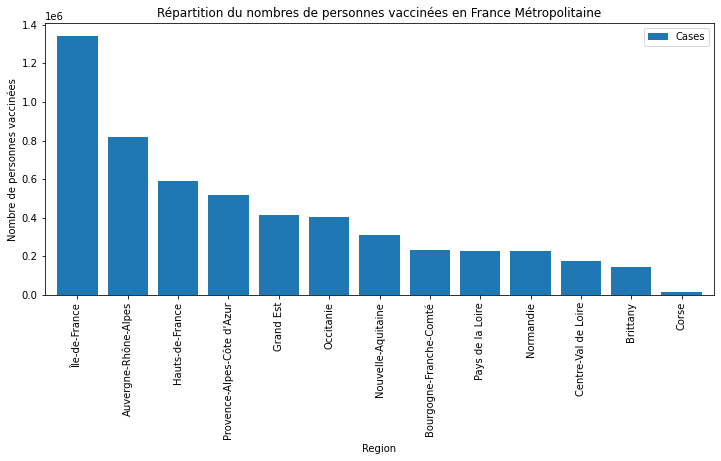

In [213]:
CasMax10 = df_fr.nlargest(15, 'Cases')
CasMax10.plot.bar(x='Region', 
                  xlabel='Region',
                  y='Cases',
                  ylabel='Nombre de personnes vaccinées',
                  title='Répartition du nombres de cas par region en France Métropolitaine',
                  figsize=(12,5),
                  width = 0.8
                 )

<AxesSubplot:title={'center':'Nombre de decces lié au COVID-19 en France Métropolitaine'}, xlabel='Region', ylabel='Nombre de deces'>

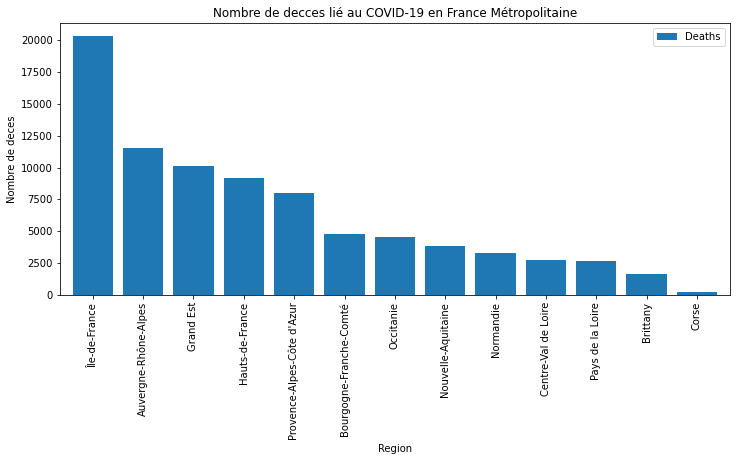

In [211]:
DecesMax10 = df_fr.nlargest(15, 'Deaths')
DecesMax10.plot.bar(x='Region', 
                    xlabel='Region',
                    y='Deaths',
                    ylabel='Nombre de deces',
                    title='Nombre de deces lié au COVID-19 par region en France Métropolitaine',
                    figsize=(12,5),
                    width = 0.8,
                 )

In [41]:
tot_vac = np.array(df_vaccin['personnes vaccinees'])
tot_vac = np.sum(tot_vac)

tot_pop = np.array(df_vaccin['population total'])
tot_pop = np.sum(tot_pop)

In [47]:
print("nombre de vaccination : ", tot_vac, "/ population totale :",tot_pop)

nombre de vaccination :  616922399.0 / population totale : 5515962954.0


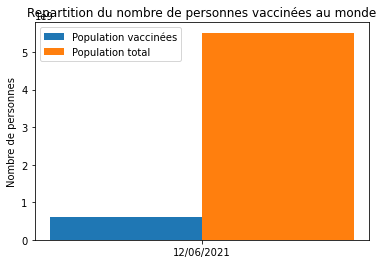

In [223]:
val1 = tot_vac
val2 = tot_pop
labels = ['12/06/2021']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, tot_vac, width, label='Population vaccinées')
rects2 = ax.bar(x + width/2, tot_pop, width, label='Population total')

ax.set_ylabel('Nombre de personnes')
ax.set_title('Repartition du nombre de personnes vaccinées au monde')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

VISUALISATION DES CHIFFRES DANS LE MONDE

<AxesSubplot:title={'center':'Top 10 des pays avec le plus de personnes vaccinées'}, xlabel='Pays', ylabel='nombre de personnes vaccinées (en millions)'>

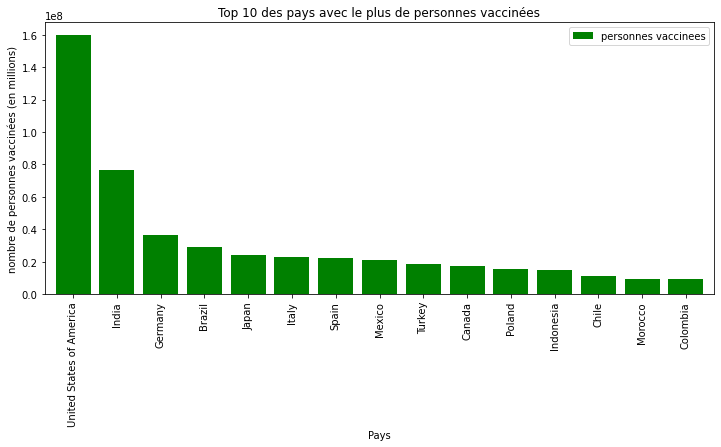

In [224]:
VacMax10 = df_vaccin.nlargest(15, 'personnes vaccinees')
VacMax10.plot.bar(x='name', 
                  xlabel='Pays',
                  y='personnes vaccinees', 
                  ylabel="nombre de personnes vaccinées (en millions)",
                  title='Top 10 des pays avec le plus de personnes vaccinées',
                  figsize=(12,5),
                  color= 'green',
                  width = 0.8,
                 )

<AxesSubplot:title={'center':'Les pays avec le moins de personnes vaccinées'}, xlabel='Pays', ylabel='Nombre personnes vaccinees'>

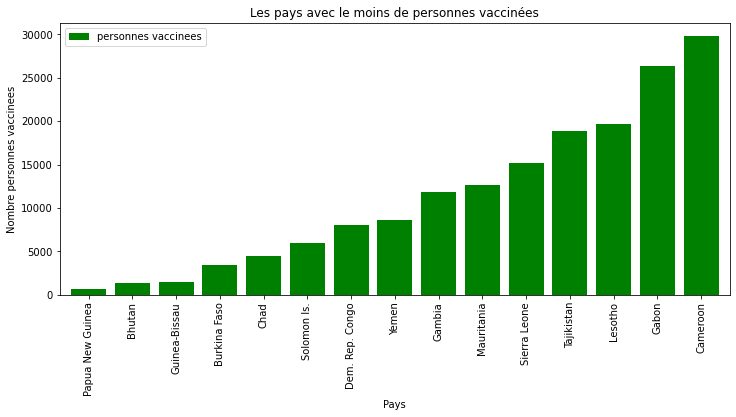

In [225]:
VacMin10 = df_vaccin[df_vaccin["personnes vaccinees"] > 0]
VacMin10 = VacMin10.nsmallest(15, 'personnes vaccinees')
VacMin10.plot.bar(x='name',
                  xlabel='Pays',
                  y='personnes vaccinees',
                  ylabel='Nombre personnes vaccinees',
                  title='Les pays avec le moins de personnes vaccinées',
                  figsize=(12, 5),
                  color='green',
                  width = 0.8,
                 )

PAYS QUI N'ONT PAS DECLARER DE VACCINATION

In [87]:
df_NoVac = df_vaccin[df_vaccin["personnes vaccinees"] == 0]
len(df_NoVac["name"])

13

In [88]:
df_NoVac['name']

14                  Burundi
18     Central African Rep.
22                    Congo
30                 Djibouti
36                  Eritrea
38                 Ethiopia
50                    Haiti
71                    Libya
74               Madagascar
89                Nicaragua
125            Turkmenistan
126                  Uganda
131                 Vanuatu
Name: name, dtype: object

In [133]:
avgNoVacCont = df_NoVac.groupby(['continent']).size()
avgNoVacCont

continent
Africa           9
Asia             1
North America    2
Oceania          1
dtype: int64

<AxesSubplot:title={'center':"Taux du nombre de pays qui n'ayant déclarer de personne vaccinées"}, ylabel='None'>

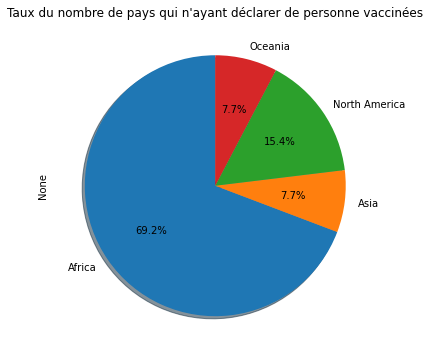

In [182]:
#avgNoVacCont.plot.pie()
avgNoVacCont.plot(kind='pie', 
                  y='continent', 
                  shadow = True, 
                  startangle=90, 
                  figsize=(8,6), 
                  autopct='%1.1f%%' , 
                  title = "Taux du nombre de pays qui n'ayant déclarer de personne vaccinées"
                 )

LES PAYS QUI ONT DECLARER DES VACCINATION

In [91]:
df_VacCont = df_vaccin[df_vaccin["personnes vaccinees"] > 0]
df_VacCont.head()

,name,iso_a3,continent,geometry,personnes vaccinees,population total
0,Afghanistan,AFG,Asia,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",219159.0,38928341.0
1,Albania,ALB,Europe,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",443165.0,2862427.0
2,Angola,AGO,Africa,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",599828.0,32866267.0
3,Armenia,ARM,Asia,"POLYGON ((46.50572 38.77061, 46.14362 38.74120...",49654.0,2963234.0
4,Azerbaijan,AZE,Asia,"MULTIPOLYGON (((46.40495 41.86068, 46.68607 41...",1664747.0,10139175.0


In [92]:
avgVacCont = df_VacCont.groupby(['continent']).size()
avgVacCont

continent
Africa           33
Asia             34
Europe           30
North America    13
Oceania           4
South America    10
dtype: int64

<AxesSubplot:title={'center':'Taux du nombre de personne vaccinées en fonction des continent'}, ylabel='None'>

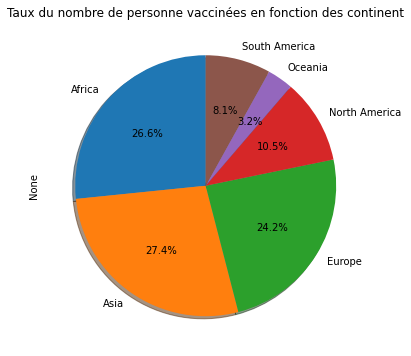

In [228]:
avgVacCont.plot(kind='pie', 
                    y='continent', 
                    shadow = True, 
                    startangle=90, 
                    figsize=(8,6), 
                    autopct='%1.1f%%' , 
                    title = "Taux du nombre de personne vaccinées en fonction des continent"
                   )

In [371]:
#df_vaccin = df_vaccin[["continent", "name", "iso_a3", "geometry"]]
#df_vaccin

In [109]:
tauxVaccinCont = df_vaccin[['continent','personnes vaccinees', 'population total']]
tauxVaccinCont.head()

,continent,personnes vaccinees,population total
0,Asia,219159.0,38928341.0
1,Europe,443165.0,2862427.0
2,Africa,599828.0,32866267.0
3,Asia,49654.0,2963234.0
4,Asia,1664747.0,10139175.0


In [114]:
df_vaccin = gpd.GeoDataFrame(df_vaccin)

In [115]:
df_vaccin['personnes vaccinees'].replace(0, np.nan)

0       219159.0
1       443165.0
2       599828.0
3        49654.0
4      1664747.0
         ...    
132    1100000.0
133     283884.0
134       8577.0
135      46489.0
136     619883.0
Name: personnes vaccinees, Length: 137, dtype: float64

In [120]:
tauxVaccinPays = df_vaccin
tauxVaccinPays.head()

,name,iso_a3,continent,geometry,personnes vaccinees,population total
0,Afghanistan,AFG,Asia,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",219159.0,38928341.0
1,Albania,ALB,Europe,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",443165.0,2862427.0
2,Angola,AGO,Africa,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",599828.0,32866267.0
3,Armenia,ARM,Asia,"POLYGON ((46.50572 38.77061, 46.14362 38.74120...",49654.0,2963234.0
4,Azerbaijan,AZE,Asia,"MULTIPOLYGON (((46.40495 41.86068, 46.68607 41...",1664747.0,10139175.0


Text(0.5, 1.0, 'v ')

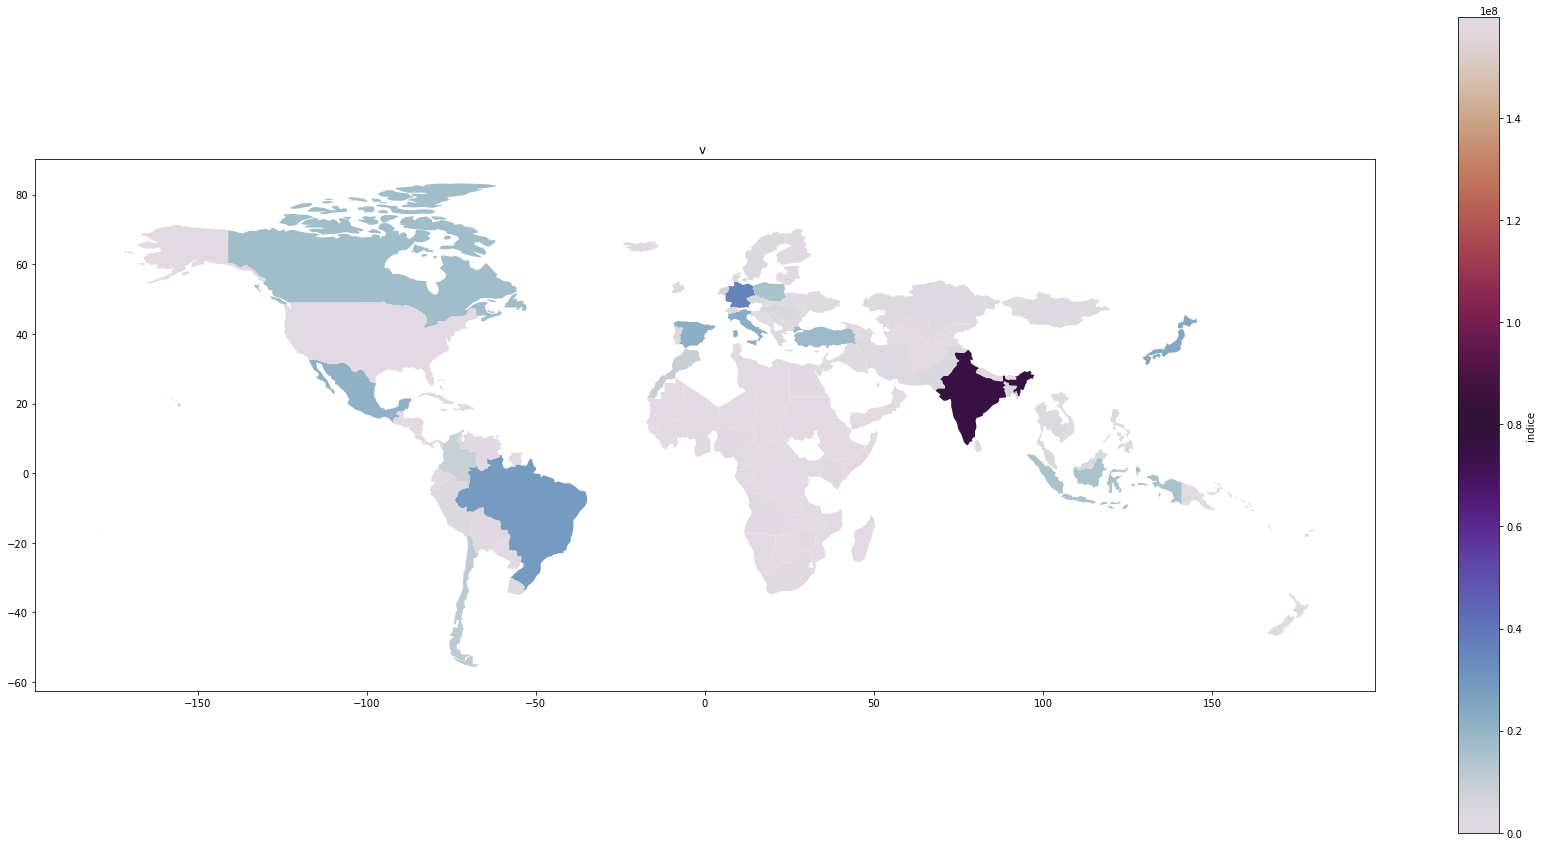

In [118]:
fig, map_literacy = plt.subplots(1, 1, figsize=(30, 15))

df_vaccin.plot(column='personnes vaccinees',
            ax=map_literacy,
            legend=True,
            cmap='twilight',
                 
            legend_kwds={'label': "indice",
                         'orientation': "vertical"
                        },
             
            missing_kwds={"color":"grey",
                          "edgecolor":"black",
                          "hatch":"---",
                          "label":"Missing Values"
                         }
            )   
map_literacy.set_title("Répartition du taux de vaccination au monde")
#map_literacy.set_axis_off()

# TEST

In [377]:
df_vaccin["moyenne"] = (df_vaccin["personnesvaccinees"] / df_vaccin["population total"])
df_vaccin

,continent,name,iso_a3,geometry,personnesvaccinees,population total,moyenne
0,Asia,Afghanistan,AFG,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",219159.0,38928341.0,0.005630
1,Europe,Albania,ALB,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",443165.0,2862427.0,0.154821
2,Africa,Angola,AGO,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",599828.0,32866267.0,0.018251
3,Asia,Armenia,ARM,"POLYGON ((46.50572 38.77061, 46.14362 38.74120...",49654.0,2963234.0,0.016757
4,Asia,Azerbaijan,AZE,"MULTIPOLYGON (((46.40495 41.86068, 46.68607 41...",1664747.0,10139175.0,0.164190
...,...,...,...,...,...,...,...
132,South America,Venezuela,VEN,"POLYGON ((-60.73357 5.20028, -60.60118 4.91810...",1100000.0,28435943.0,0.038683
133,Asia,Vietnam,VNM,"POLYGON ((104.33433 10.48654, 105.19991 10.889...",283884.0,97338583.0,0.002916
134,Asia,Yemen,YEM,"POLYGON ((52.00001 19.00000, 52.78218 17.34974...",8577.0,29825967.0,0.000288
135,Africa,Zambia,ZMB,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458...",46489.0,18383956.0,0.002529


AttributeError: 'Line2D' object has no property 'column'

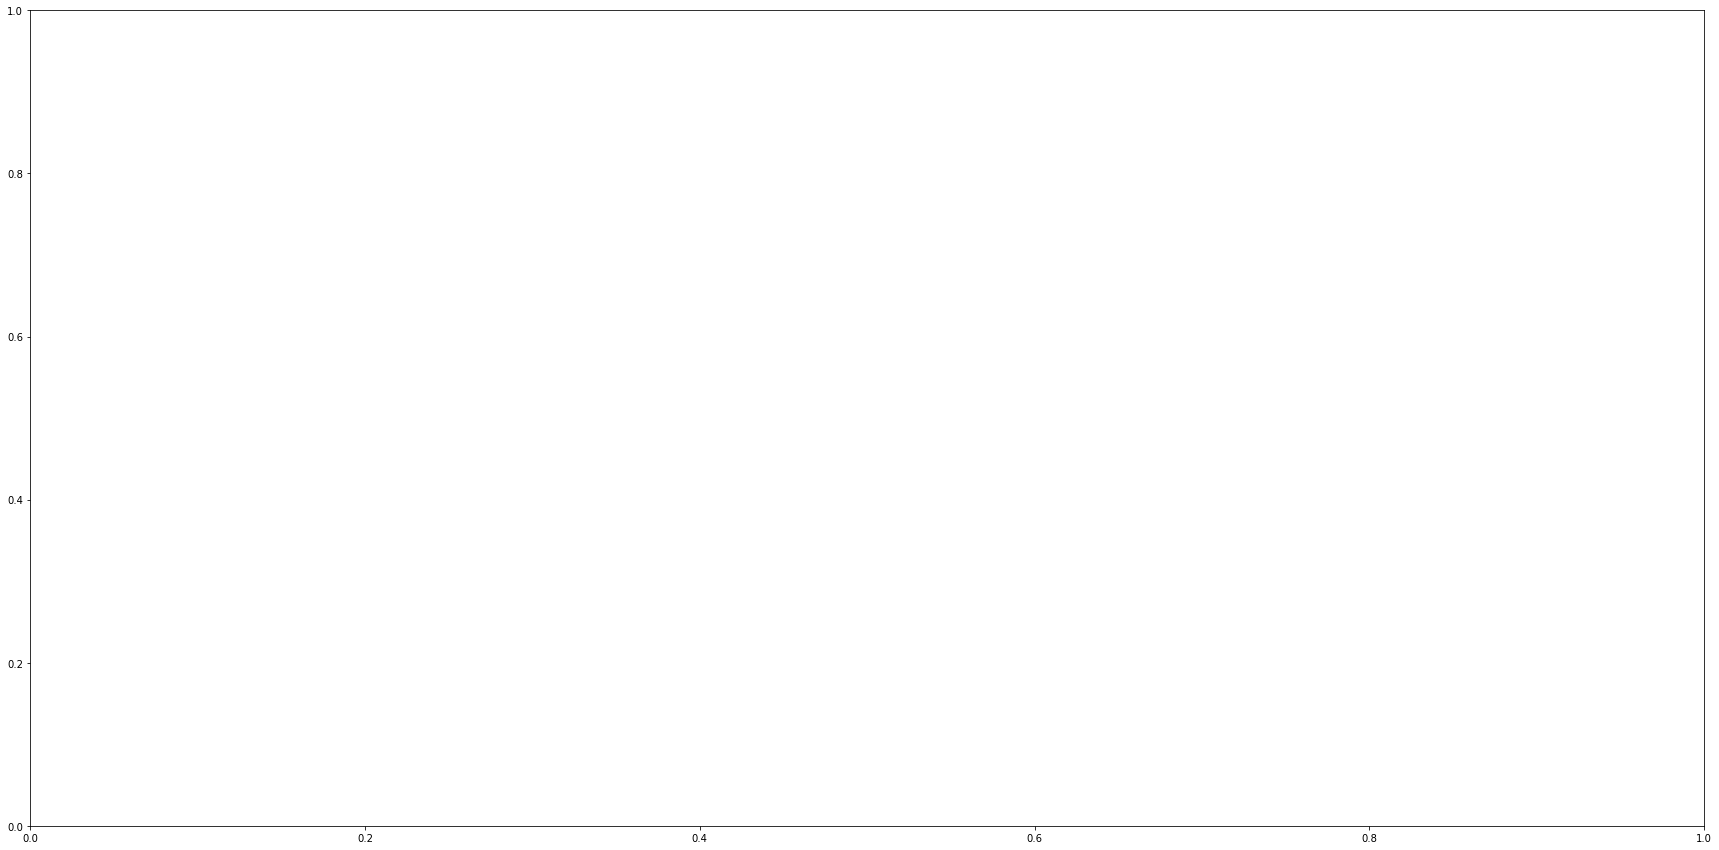

In [379]:
fig, map_literacy = plt.subplots(1, 1, figsize=(30, 15))

df_vaccin.plot(column='moyenne',
            ax=map_literacy,
            legend=True,
            cmap='twilight',
                 
            legend_kwds={'label': "indice",
                         'orientation': "vertical"
                        },
             
            missing_kwds={"color":"grey",
                          "edgecolor":"black",
                          "hatch":"---",
                          "label":"Missing Values"
                         }
            )   
map_literacy.set_title("v ")
#map_literacy.set_axis_off()

In [112]:
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = df_world.loc[df_world['continent'] == 'Europa']

In [116]:
france = europe.loc[europe['name'] == 'France']
france.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry


<AxesSubplot:>

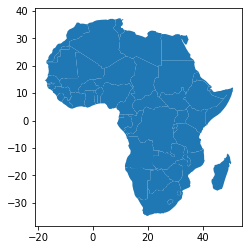

In [108]:
africa = df_world.loc[df_world['continent'] == 'Africa']
africa.plot()

<AxesSubplot:>

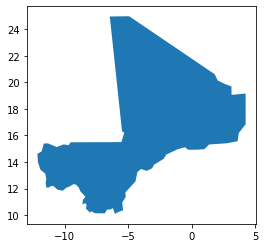

In [111]:
mali = africa.loc[africa['name'] == 'Mali']
mali.plot()